In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

In [10]:
!ls ../data

histogram.csv  padded_test.ppm	test_gray.ppm  test.jpg


## Load original image

In [11]:
img = plt.imread('../data/test.jpg')
img.shape

(410, 540, 3)

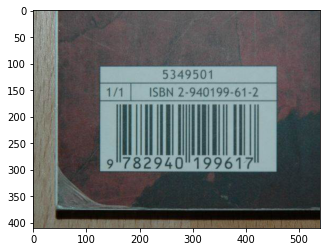

In [12]:
plt.imshow(img)
plt.show()

## Load padded image

In [13]:
tile_size = 16

In [14]:
img_pad = plt.imread('../data/padded_test.ppm')
img_pad.shape

(416, 544, 3)

In [15]:
nb_rows = int(img_pad.shape[0] / tile_size)
nb_cols = int(img_pad.shape[1] / tile_size)

In [16]:
nb_rows, nb_cols

(26, 34)

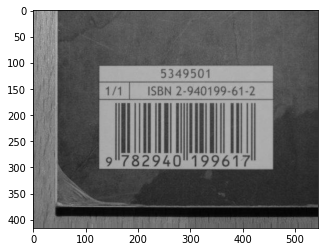

In [17]:
plt.imshow(img_pad)
plt.show()

## Load histogram

In [112]:
km_res = pd.read_csv('../km_res.csv', sep=',',header=None)

In [113]:
km_res = np.array(km_res)

In [114]:
km_res.shape

(26, 34)

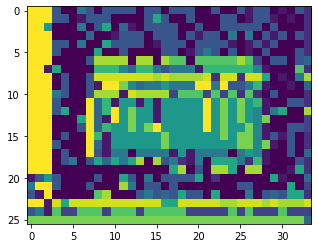

In [115]:
plt.imshow(km_res)

## KMeans K=16

In [92]:
!ls ./../data/

histogram.csv  padded_test.ppm	test_gray.ppm  test.jpg


In [93]:
histogram = pd.read_csv('./../data/histogram.csv', header=None)

In [60]:
histogram.shape

(884, 256)

In [61]:
histogram

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,25,0,20,2,1,0,3,1,0,1,...,2,0,4,1,0,0,1,15,3,18
1,23,0,10,5,0,0,3,0,2,6,...,3,2,5,3,0,1,1,11,1,18
2,22,0,12,2,0,0,2,0,0,2,...,0,3,3,0,0,0,1,15,0,10
3,10,0,6,2,0,0,3,2,5,5,...,0,2,9,3,0,0,2,2,2,16
4,12,0,6,3,0,0,1,1,8,2,...,6,4,5,2,0,0,5,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,11,1,9,3,0,0,2,0,0,2,...,2,0,6,3,0,1,2,8,0,46
880,12,2,11,2,0,0,0,0,1,0,...,0,0,4,0,0,3,0,9,1,33
881,9,0,6,0,1,0,5,0,2,1,...,0,2,3,3,0,1,0,7,1,26
882,6,0,7,1,0,0,2,0,2,1,...,1,0,5,1,0,0,0,9,1,41


In [74]:
kmeans = KMeans(n_clusters=16, random_state=0, init='random', algorithm='full', max_iter=6).fit(histogram)

In [79]:
kmeans.cluster_centers_

array([[ 7.58823529,  0.29411765,  9.94117647, ...,  6.64705882,
         0.35294118, 38.76470588],
       [ 4.41176471,  0.14705882,  1.26470588, ...,  0.91176471,
         1.61764706, 30.20588235],
       [ 9.15789474,  0.21052632,  1.21052632, ...,  0.71929825,
         0.77192982, 20.15789474],
       ...,
       [18.36956522,  0.58695652, 14.34782609, ..., 12.54347826,
         0.76086957, 16.56521739],
       [ 8.38666667,  0.25333333,  3.16      , ...,  2.49333333,
         1.32      , 20.78666667],
       [10.8015873 ,  0.49206349,  5.72222222, ...,  4.08730159,
         1.03968254, 13.66666667]])

In [75]:
preds = kmeans.predict(histogram)

In [76]:
preds.shape

(884,)

In [77]:
preds_reshape = preds.reshape((nb_rows, nb_cols))

In [78]:
preds_reshape.shape

(26, 34)

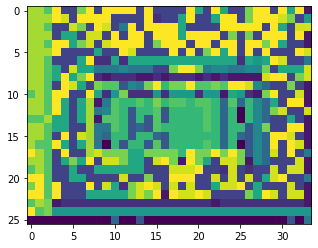

In [73]:
plt.imshow(preds_reshape)
plt.show()